In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=80, facecolor="w", frameon=True, figsize=(4, 4))

# Projection

In [3]:
from tiscope.function import TISCOPE_projection

/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
adata_ref = sc.read("./AD_integration/adata.h5ad")
adata = sc.read("/data2/liyuzhe/data/SPACEX/adata_ADmouse.h5ad")
adata = adata[adata.obs.label.isin(["8months-disease-replicate_1", "8months-disease-replicate_2", "13months-disease-replicate_1", "13months-disease-replicate_2"])]
adata

View of AnnData object with n_obs × n_vars = 36394 × 2766
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'X', 'Y', 'X-scaled', 'Y-scaled', 'tissue'
    uns: 'batch_colors', 'log1p'
    obsm: 'spatial'

In [5]:
adata = TISCOPE_projection(adata, adata_ref, outdir="./AD_projection", model_path="./AD_integration")

Constructing graph for projection...
Processing slice ADmouse_11346_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Processing slice ADmouse_9494_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Processing slice ADmouse_9723_2_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data
/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


Processing slice ADmouse_9723_brain...
Computing spatial neighborhood graph...
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/squidpy/gr/_utils.py:203: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  obj[key] = data


Computed neighbor average in 0.03 mins


/data1/ningweixi/HOME/projects/TISCOPE/src/tiscope/function.py:526: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  edge_index = torch.tensor(A.nonzero(), dtype=torch.long)


computing neighbors
    finished: added to `.uns['TISCOPE']`
    `.obsp['TISCOPE_distances']`, distances for each pair of neighbors
    `.obsp['TISCOPE_connectivities']`, weighted adjacency matrix (0:00:32)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:48)
Projection results saved to ./AD_projection/adata_projection.h5ad


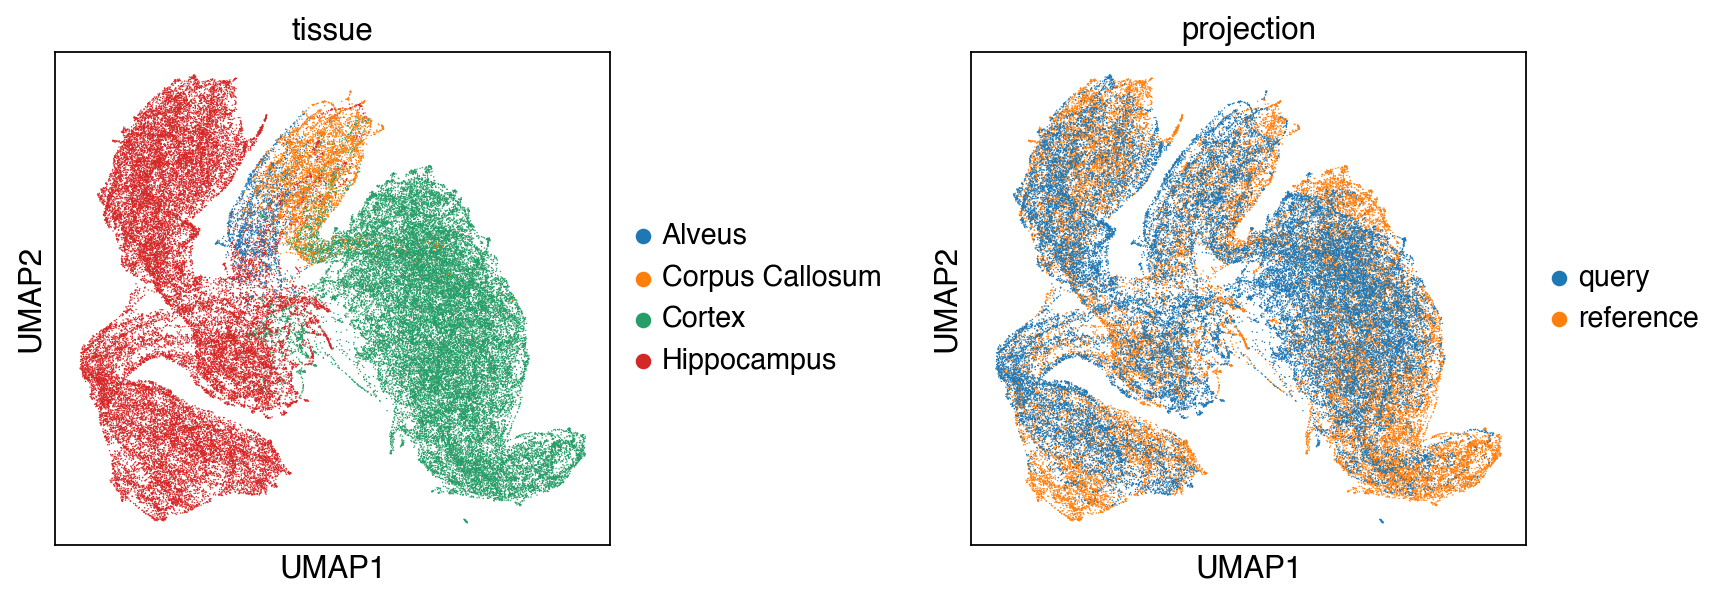

In [6]:
sc.set_figure_params(dpi=80, facecolor="w", frameon=True, figsize=(4, 4))
sc.pl.umap(adata, color=["tissue", "projection"], wspace=0.5)

# Label transfer

In [7]:
adata = sc.read("./AD_projection/adata_projection.h5ad")
adata

AnnData object with n_obs × n_vars = 72165 × 2766
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'X', 'Y', 'X-scaled', 'Y-scaled', 'tissue', 'projection'
    uns: 'TISCOPE', 'umap'
    obsm: 'X_umap', 'latent', 'spatial'
    obsp: 'TISCOPE_connectivities', 'TISCOPE_distances'

In [8]:
adata_query = adata[adata.obs.projection == "query"]
adata_query

View of AnnData object with n_obs × n_vars = 36394 × 2766
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'X', 'Y', 'X-scaled', 'Y-scaled', 'tissue', 'projection'
    uns: 'TISCOPE', 'umap'
    obsm: 'X_umap', 'latent', 'spatial'
    obsp: 'TISCOPE_connectivities', 'TISCOPE_distances'

In [9]:
adata_ref = adata[adata.obs.projection == "reference"]
adata_ref

View of AnnData object with n_obs × n_vars = 35771 × 2766
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'X', 'Y', 'X-scaled', 'Y-scaled', 'tissue', 'projection'
    uns: 'TISCOPE', 'umap'
    obsm: 'X_umap', 'latent', 'spatial'
    obsp: 'TISCOPE_connectivities', 'TISCOPE_distances'

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Fit kNN classifier on the reference
knn = KNeighborsClassifier(n_neighbors=20, weights="distance")
knn.fit(X=adata_ref.obsm["latent"], y=adata_ref.obs[["tissue"]])

# Predict labels with the knn classifier
proba = knn.predict_proba(adata_query.obsm["latent"])
k_dist, k_indx = knn.kneighbors(adata_query.obsm["latent"], n_neighbors=20, return_distance=True)

predictions = proba
predictions = pd.DataFrame(
    {"tissue_transfer": np.argmax(predictions, axis=1), "probability": np.max(predictions, axis=1), "mean_dist": np.mean(k_dist, axis=1), "k_dist": k_dist[:, 19]}
)
predictions["tissue_transfer"] = predictions["tissue_transfer"].map({i: l for i, l in enumerate(knn.classes_)})
predictions.index = adata_query.obs.index

adata_query.obs = pd.concat([adata_query.obs, predictions], axis=1)

/home/ningweixi/miniconda3/envs/tiscope/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn.metrics import classification_report

In [12]:
report = classification_report(adata_query.obs["tissue"], adata_query.obs["tissue_transfer"])
print(report)

                 precision    recall  f1-score   support

         Alveus       0.59      0.22      0.32      1308
Corpus Callosum       0.60      0.77      0.67      2462
         Cortex       0.97      0.96      0.96     16262
    Hippocampus       0.95      0.96      0.95     16362

       accuracy                           0.92     36394
      macro avg       0.78      0.73      0.73     36394
   weighted avg       0.92      0.92      0.92     36394



In [13]:
from sklearn.metrics.cluster import adjusted_rand_score as ARI
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

In [14]:
ARI(adata_query.obs["tissue"], adata_query.obs["tissue_transfer"])

0.854239705716945

In [15]:
NMI(adata_query.obs["tissue"], adata_query.obs["tissue_transfer"])

0.7217459577229034

In [16]:
import seaborn as sns

/tmp/ipykernel_3202170/1911565686.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display_matrix = display_matrix.applymap(lambda x: f"{x:.3f}" if x > 0.2 else "")


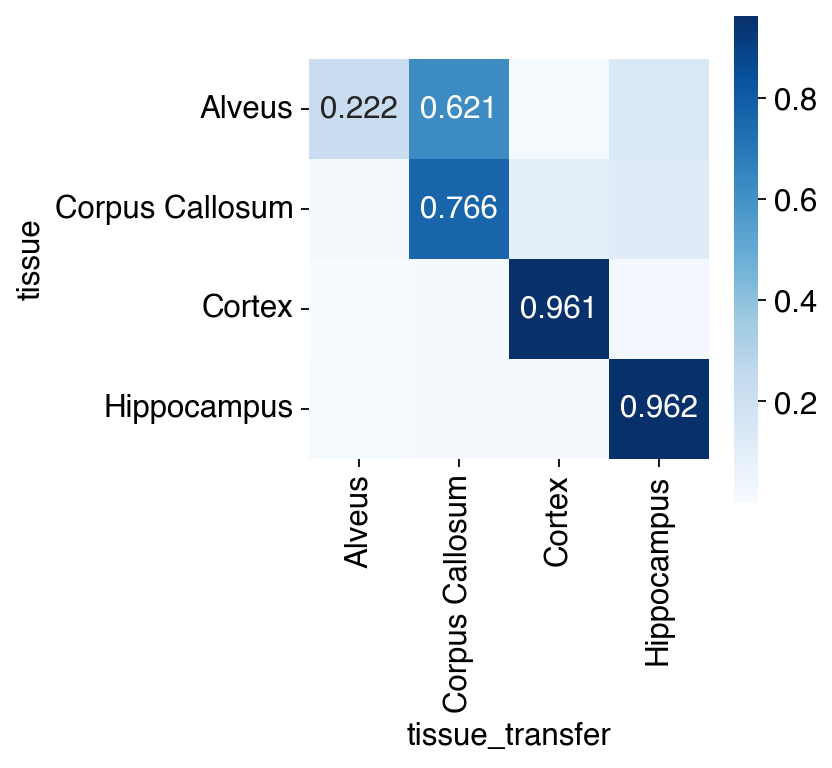

In [18]:
cm = pd.crosstab(adata_query.obs["tissue"], adata_query.obs["tissue_transfer"])
cm = cm.div(cm.sum(axis=1), axis=0)
display_matrix = cm.copy()
display_matrix = display_matrix.applymap(lambda x: f"{x:.3f}" if x > 0.2 else "")
ax = sns.heatmap(cm, cmap="Blues", square=True, annot=display_matrix, fmt="")
ax.grid(False)